# Лабораторна робота №3 з дисципліни "Штучні нейронні мережі"
### Виконав Чистяков Данило

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import PIL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

from sklearn.metrics import classification_report, confusion_matrix

### Робота із набором даних


In [2]:
train_dir = './image_data/train'

filepaths = []
labels = []

folders = os.listdir(train_dir)

for folder in folders:
    folder_path = os.path.join(train_dir, folder)
    
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)

        filepaths.append(file_path)
        labels.append(folder)

train_df = pd.DataFrame(data={'filepaths': filepaths, "labels": labels})

train_df

,filepaths,labels
0,./image_data/train/volleyball/volleyball_787.jpg,volleyball
1,./image_data/train/volleyball/volleyball_766.jpg,volleyball
2,./image_data/train/volleyball/volleyball_235.jpg,volleyball
3,./image_data/train/volleyball/volleyball_6.jpg,volleyball
4,./image_data/train/volleyball/volleyball_507.jpg,volleyball
...,...,...
7323,./image_data/train/table_tennis_ball/table_ten...,table_tennis_ball
7324,./image_data/train/table_tennis_ball/table_ten...,table_tennis_ball
7325,./image_data/train/table_tennis_ball/table_ten...,table_tennis_ball
7326,./image_data/train/table_tennis_ball/table_ten...,table_tennis_ball


In [3]:
test_dir = './image_data/test'

filepaths = []
labels = []

folders = os.listdir(test_dir)

for folder in folders:
    folder_path = os.path.join(test_dir, folder)
    
    files = os.listdir(folder_path)
    for file in files:
        file_path = os.path.join(folder_path, file)

        filepaths.append(file_path)
        labels.append(folder)

tst_df = pd.DataFrame(data={'filepaths': filepaths, "labels": labels})

tst_df

,filepaths,labels
0,./image_data/test/volleyball/volleyball_490.jpg,volleyball
1,./image_data/test/volleyball/volleyball_430.jpg,volleyball
2,./image_data/test/volleyball/volleyball_767.jpg,volleyball
3,./image_data/test/volleyball/volleyball_455.jpg,volleyball
4,./image_data/test/volleyball/volleyball_778.jpg,volleyball
...,...,...
1836,./image_data/test/table_tennis_ball/table_tenn...,table_tennis_ball
1837,./image_data/test/table_tennis_ball/table_tenn...,table_tennis_ball
1838,./image_data/test/table_tennis_ball/table_tenn...,table_tennis_ball
1839,./image_data/test/table_tennis_ball/table_tenn...,table_tennis_ball


In [4]:
valid_df, test_df = train_test_split(tst_df, test_size=0.5, random_state=42)

In [5]:
gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=(224, 224),
                                   color_mode='rgb', class_mode='categorical', batch_size=32)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=(224, 224),
                                   color_mode='rgb', class_mode='categorical', batch_size=32)

test_gen = gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=(224, 224),
                                   color_mode='rgb', class_mode='categorical', batch_size=32)

Found 7328 validated image filenames belonging to 15 classes.
Found 920 validated image filenames belonging to 15 classes.
Found 921 validated image filenames belonging to 15 classes.


### Модель

In [6]:
model = Sequential([
 Conv2D(46, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    Conv2D(46, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.15),
    
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(15, activation='softmax', kernel_regularizer=l2(0.16))
])

model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



model.summary()

/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1730468561.409465   26524 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5494 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 46)   │         1,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 46)   │        19,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 220, 220, 46)   │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 46)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 110, 110, 46)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        53,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 106, 106, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 51, 51, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 23, 23, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │        58,095 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,953 (2.48 MB)

 Trainable params: 649,029 (2.48 MB)

 Non-trainable params: 924 (3.61 KB)

In [7]:
history = model.fit(train_gen, validation_data=valid_gen, epochs=40)

/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40


I0000 00:00:1730468569.683576   26589 service.cc:148] XLA service 0x727c40001ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730468569.683598   26589 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2024-11-01 15:42:49.801762: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730468570.079198   26589 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-11-01 15:42:51.829178: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activa

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.1644 - loss: 7.1859

2024-11-01 15:44:36.577745: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-01 15:44:39.152283: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[32,128,108,108]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,46,110,110]{3,2,1,0}, f32[128,46,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_conf

229/229 ━━━━━━━━━━━━━━━━━━━━ 132s 418ms/step - accuracy: 0.1646 - loss: 7.1815 - val_accuracy: 0.2511 - val_loss: 4.8067
Epoch 2/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 69s 300ms/step - accuracy: 0.2974 - loss: 4.3617 - val_accuracy: 0.2728 - val_loss: 3.6825
Epoch 3/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 71s 308ms/step - accuracy: 0.3543 - loss: 3.1951 - val_accuracy: 0.3174 - val_loss: 2.9343
Epoch 4/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 69s 303ms/step - accuracy: 0.4156 - loss: 2.5143 - val_accuracy: 0.3033 - val_loss: 2.6830
Epoch 5/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 70s 303ms/step - accuracy: 0.4560 - loss: 2.1350 - val_accuracy: 0.3391 - val_loss: 2.4404
Epoch 6/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 69s 303ms/step - accuracy: 0.5087 - loss: 1.9079 - val_accuracy: 0.4250 - val_loss: 2.1720
Epoch 7/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 70s 303ms/step - accuracy: 0.5272 - loss: 1.7699 - val_accuracy: 0.3641 - val_loss: 2.3099
Epoch 8/40
229/229 ━━━━━━━━━━━━━━━━━━━━ 70s 303ms/step - accuracy: 0.5640 - loss: 1.6698 - va

### Результати

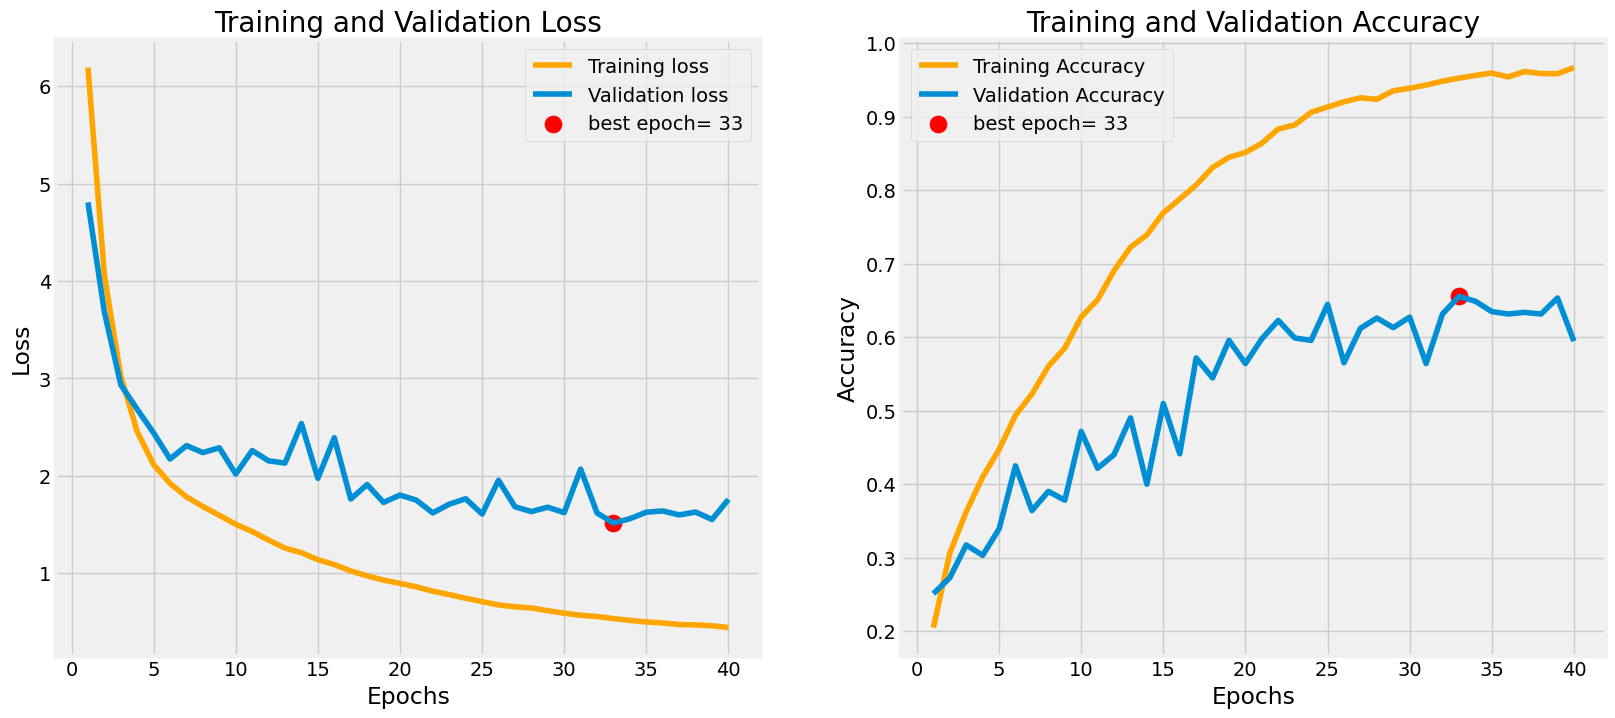

In [8]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

Epochs = [i+1 for i in range(len(tr_acc))]

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'orange', label= 'Training loss')
plt.plot(Epochs, val_loss, label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'red', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'orange', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'red', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [9]:
train_score = model.evaluate(train_gen)
valid_score = model.evaluate(valid_gen)
test_score = model.evaluate(test_gen)

pd.DataFrame({
    '': ['Loss','Accuracy'],
    'Train score': [train_score[0], f'{round(train_score[1] * 100, 2)}%'],
    'Valid score': [valid_score[0], f'{round(valid_score[1] * 100, 2)}%'],
    'Test score': [test_score[0], f'{round(test_score[1] * 100, 2)}%']
})

229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9374 - loss: 0.4737
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6056 - loss: 1.6970


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/29 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.6067 - loss: 1.7155

2024-11-01 16:33:17.464739: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[25,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-01 16:33:19.412694: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[25,128,108,108]{3,2,1,0}, u8[0]{0}) custom-call(f32[25,46,110,110]{3,2,1,0}, f32[128,46,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_conf

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 403ms/step - accuracy: 0.6062 - loss: 1.7217


,,Train score,Valid score,Test score
0,Loss,0.481331,1.758021,1.808437
1,Accuracy,93.53%,59.46%,59.93%


### Крос-валідація

In [11]:
def create_model():
    model = Sequential([
    Conv2D(46, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)),
    Conv2D(46, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.15),
    
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    Conv2D(128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.5),
    
    Conv2D(32, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.1),
    
    Flatten(),
    Dense(15, activation='softmax', kernel_regularizer=l2(0.16))
])

    model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

gen = ImageDataGenerator()

In [14]:
for train_index, valid_index in kf.split(train_df):
    train_data = train_df.iloc[train_index]
    valid_data = train_df.iloc[valid_index]

    # Створіть генератори для поточного фолду
    train_gen = gen.flow_from_dataframe(train_data, x_col='filepaths', y_col='labels', target_size=(224, 224),
                                         color_mode='rgb', class_mode='categorical', batch_size=32)
    valid_gen = gen.flow_from_dataframe(valid_data, x_col='filepaths', y_col='labels', target_size=(224, 224),
                                         color_mode='rgb', class_mode='categorical', batch_size=32)

    # Створіть модель
    model = create_model()

    # Навчайте модель на 3 епохи
    history = model.fit(train_gen, validation_data=valid_gen, epochs=3, verbose=1)
    
    # Зберігайте результати
    scores = model.evaluate(valid_gen, verbose=0)
    results.append(scores)

Found 5862 validated image filenames belonging to 15 classes.
Found 1466 validated image filenames belonging to 15 classes.


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
 69/184 ━━━━━━━━━━━━━━━━━━━━ 32s 284ms/step - accuracy: 0.1086 - loss: 8.3163

2024-11-01 16:39:41.683390: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[6,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[6,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-01 16:39:42.194974: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[6,128,108,108]{3,2,1,0}, u8[0]{0}) custom-call(f32[6,46,110,110]{3,2,1,0}, f32[128,46,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={

 70/184 ━━━━━━━━━━━━━━━━━━━━ 49s 437ms/step - accuracy: 0.1089 - loss: 8.3058

2024-11-01 16:39:51.303673: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 232 bytes spill stores, 232 bytes spill loads



184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.1385 - loss: 7.5067

2024-11-01 16:40:29.208559: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[26,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-01 16:40:31.263208: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[26,128,108,108]{3,2,1,0}, u8[0]{0}) custom-call(f32[26,46,110,110]{3,2,1,0}, f32[128,46,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_conf

184/184 ━━━━━━━━━━━━━━━━━━━━ 83s 414ms/step - accuracy: 0.1387 - loss: 7.5018 - val_accuracy: 0.2244 - val_loss: 5.3460
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 308ms/step - accuracy: 0.2751 - loss: 4.9748 - val_accuracy: 0.2381 - val_loss: 4.3227
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.3371 - loss: 3.8644 - val_accuracy: 0.2067 - val_loss: 3.7854
Found 5862 validated image filenames belonging to 15 classes.
Found 1466 validated image filenames belonging to 15 classes.


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
 34/184 ━━━━━━━━━━━━━━━━━━━━ 43s 291ms/step - accuracy: 0.0867 - loss: 8.8719

2024-11-01 16:42:57.270667: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 232 bytes spill stores, 232 bytes spill loads



184/184 ━━━━━━━━━━━━━━━━━━━━ 70s 343ms/step - accuracy: 0.1476 - loss: 7.5079 - val_accuracy: 0.2217 - val_loss: 5.2744
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 59s 318ms/step - accuracy: 0.2811 - loss: 4.8485 - val_accuracy: 0.2824 - val_loss: 4.1202
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.3529 - loss: 3.7125 - val_accuracy: 0.2844 - val_loss: 3.4282
Found 5862 validated image filenames belonging to 15 classes.
Found 1466 validated image filenames belonging to 15 classes.


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
 15/184 ━━━━━━━━━━━━━━━━━━━━ 1:52 663ms/step - accuracy: 0.0925 - loss: 9.0011

2024-11-01 16:46:01.893475: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_1', 232 bytes spill stores, 232 bytes spill loads



184/184 ━━━━━━━━━━━━━━━━━━━━ 71s 347ms/step - accuracy: 0.1352 - loss: 7.6674 - val_accuracy: 0.1767 - val_loss: 5.6280
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 310ms/step - accuracy: 0.2532 - loss: 5.2860 - val_accuracy: 0.2196 - val_loss: 4.5613
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 312ms/step - accuracy: 0.3049 - loss: 4.1560 - val_accuracy: 0.2483 - val_loss: 3.8409
Found 5863 validated image filenames belonging to 15 classes.
Found 1465 validated image filenames belonging to 15 classes.


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
 16/184 ━━━━━━━━━━━━━━━━━━━━ 49s 292ms/step - accuracy: 0.1074 - loss: 8.9700

2024-11-01 16:49:08.215211: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[7,46,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[7,46,222,222]{3,2,1,0}, f32[46,46,3,3]{3,2,1,0}, f32[46]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-01 16:49:08.800876: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{} for conv (f32[7,128,108,108]{3,2,1,0}, u8[0]{0}) custom-call(f32[7,46,110,110]{3,2,1,0}, f32[128,46,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={

184/184 ━━━━━━━━━━━━━━━━━━━━ 77s 381ms/step - accuracy: 0.1677 - loss: 7.3677 - val_accuracy: 0.2403 - val_loss: 5.1995
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 313ms/step - accuracy: 0.2849 - loss: 4.8173 - val_accuracy: 0.2799 - val_loss: 4.0341
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 314ms/step - accuracy: 0.3632 - loss: 3.6059 - val_accuracy: 0.3058 - val_loss: 3.3332
Found 5863 validated image filenames belonging to 15 classes.
Found 1465 validated image filenames belonging to 15 classes.


/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/media/alllpina/HDD/University/Artifical_intellegence_systems/AISVenv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 71s 345ms/step - accuracy: 0.1352 - loss: 7.4756 - val_accuracy: 0.1706 - val_loss: 5.3946
Epoch 2/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 312ms/step - accuracy: 0.2600 - loss: 5.0182 - val_accuracy: 0.2205 - val_loss: 4.3344
Epoch 3/3
184/184 ━━━━━━━━━━━━━━━━━━━━ 58s 313ms/step - accuracy: 0.3300 - loss: 3.9308 - val_accuracy: 0.2608 - val_loss: 3.6606


In [24]:
sum = 0
for i, score in enumerate(results):
    print(f"Fold {i+1}: Loss: {score[0]}, Accuracy: {score[1]}")
    sum += score[1]

print("Avg accuracy: ",sum / len(results))




Fold 1: Loss: 3.7854392528533936, Accuracy: 0.20668485760688782
Fold 2: Loss: 3.4281647205352783, Accuracy: 0.28444746136665344
Fold 3: Loss: 3.8409464359283447, Accuracy: 0.2482946813106537
Fold 4: Loss: 3.3331809043884277, Accuracy: 0.30580204725265503
Fold 5: Loss: 3.6605706214904785, Accuracy: 0.2607508599758148
Avg accuracy:  0.261195981502533
